# 4 Classification

## 4.1 An Overview of Classification

Classification problems are similar to regression problems. Both have a set of training observations that are used to build a classifier and we want the classifier to perform well with test observations not used to train the model.

### Insights into the `Default` data set

In [1]:
library(ISLR2)
attach(Default)
head(Default)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


We are interested in predicting whether an individual will default on their credit card payment on the basis of income or monthly balance. Below are some visuals of the data.

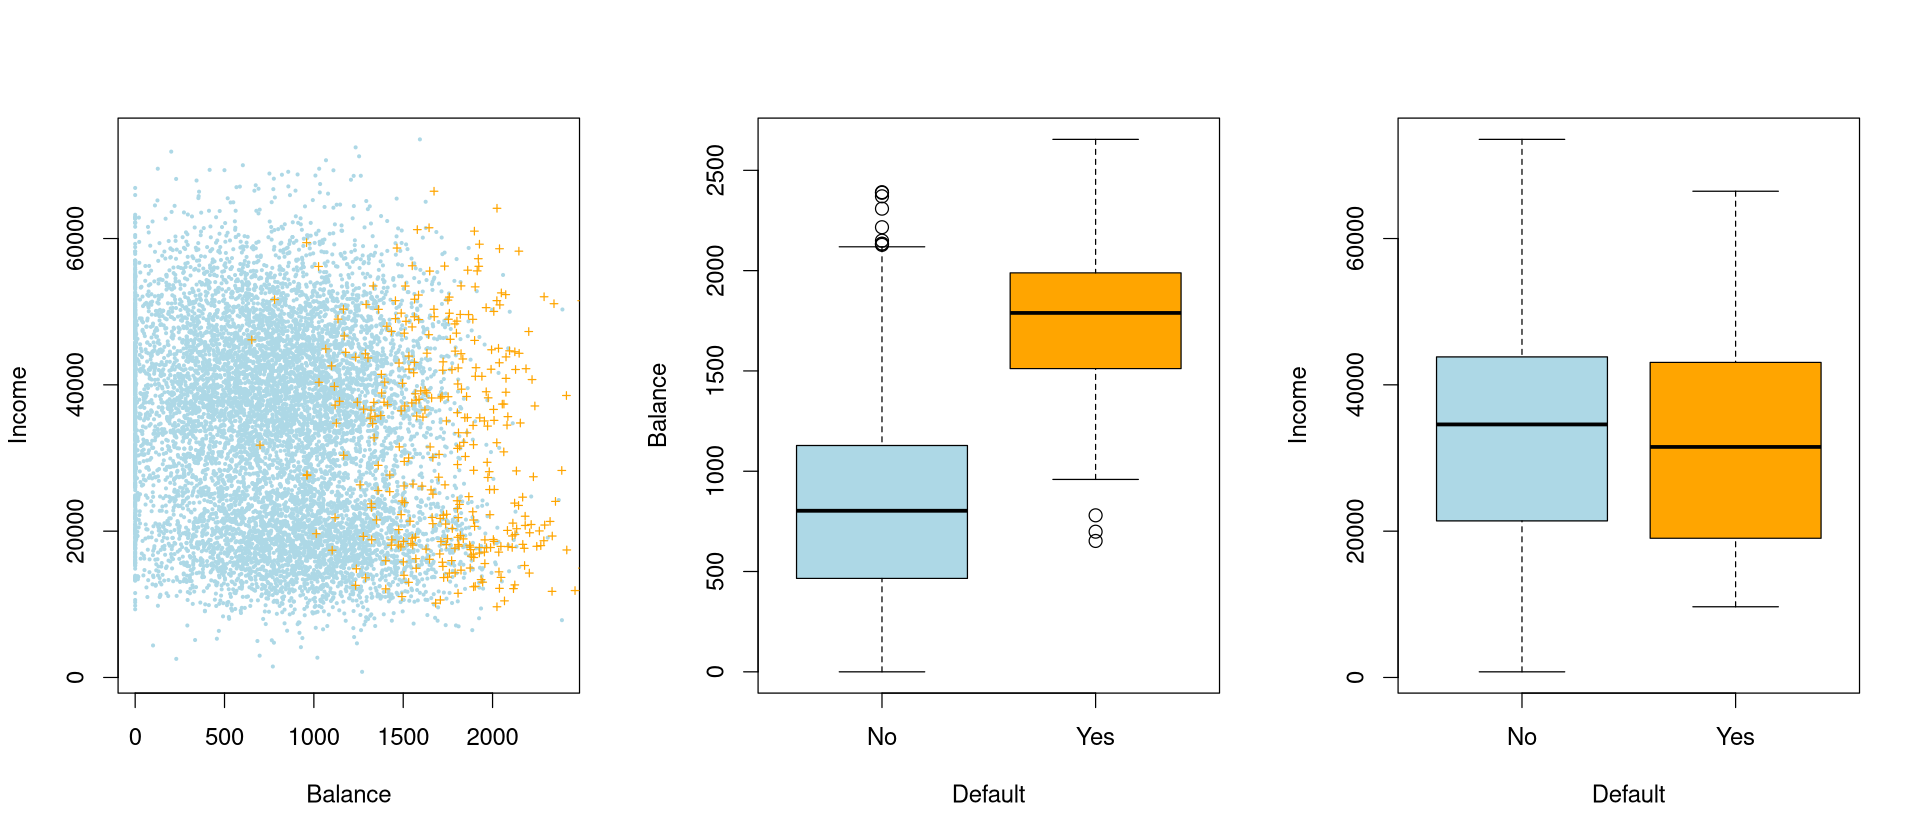

In [2]:
par(mfrow = c(1, 3), cex=1.2)
options(repr.plot.width=16, repr.plot.height=7)
dy <- Default[default == "Yes",]
dn <- Default[default == "No",]
plot(dn$balance, dn$income, xlab="Balance", ylab="Income", col="lightblue", pch=20, cex=.4)
points(dy$balance, dy$income, col="orange", pch=3, cex=.5)
plot(default, balance, xlab="Default", ylab="Balance", col=c("lightblue", "orange"))
plot(default, income, xlab="Default", ylab="Income", col=c("lightblue", "orange"))
options(repr.plot.width=7, repr.plot.height=7)

__FIGURE 4.1__. The `Default` data set. Left: The annual incomes and monthly credit card balances of a number of individuals. The individuals who defaulted on their credit card payments are shown in `orange crosses`, and those who did not are shown in `light blue points`. Center: Boxplots of `balance` as a function of `default` status. Right: Boxplots of `income` as a function of `default` status.

---

## 4.2 Why Not Linear Regression?

The reason you would not use regression in a classification problem is because there is no order in the classifications. If there are three possible diagnoses: `stroke`, `drug overdose`, or `eplieptic seizure`; none of these can be considered `first`, `second`, and `third`. Order would not make sense.

In the `Default` example, if we used linear regression and recode the default variable to `0` and `1`. Then we get the graph on the left. Here, as you can see, some of the predictions are actually negative which does not make sense. The graph on the right is produced using logistic regression which is more applicable.

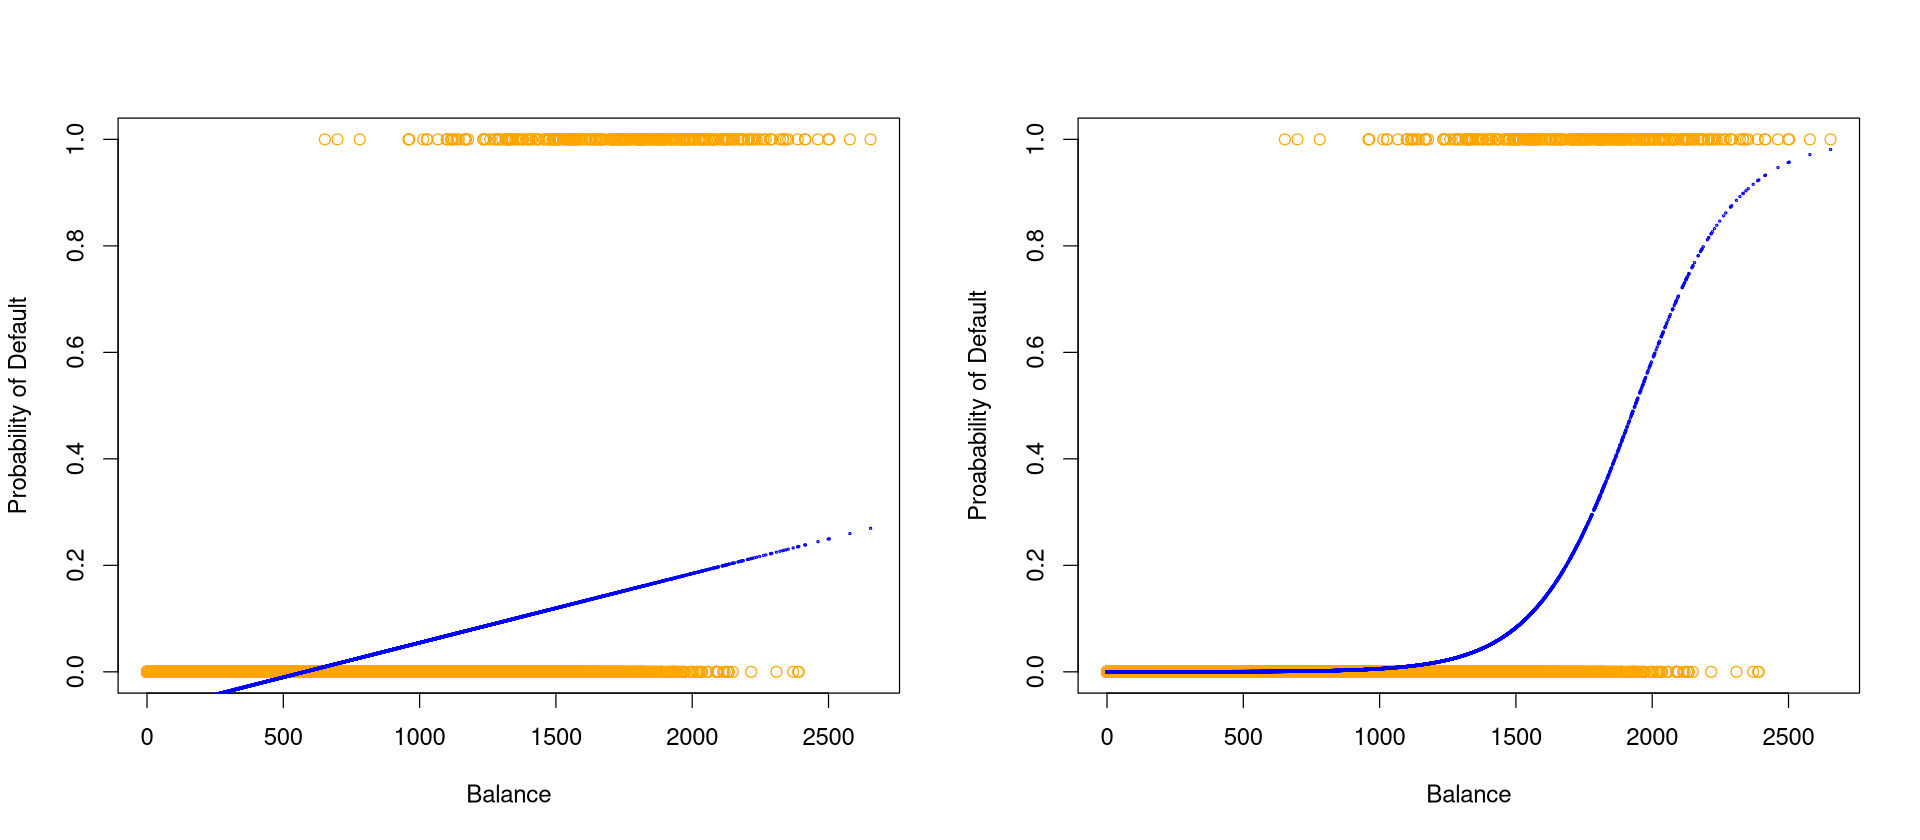

In [3]:
Default.coded <- Default
Default.coded$default <- as.character(Default.coded$default)
Default.coded$default[Default.coded$default == "Yes"] <- 1 
Default.coded$default[Default.coded$default == "No"] <- 0
Default.coded$default <- as.numeric(Default.coded$default)
fit <- lm(Default.coded$default ~ Default.coded$balance, data=Default)
glm.fit <- glm(default ~ balance, data=Default, family=binomial)
options(repr.plot.width=16, repr.plot.height=7)
par(mfrow = c(1, 2), cex=1.2)
plot(Default.coded$balance, Default.coded$default, col="orange", xlab="Balance", ylab="Probability of Default")
points(Default.coded$balance, fit$fit, cex=.2, col="blue")
plot(Default.coded$balance, Default.coded$default, col="orange", xlab="Balance", ylab="Proabability of Default")
points(Default.coded$balance,glm.fit$fit, cex=.2, col="blue")
options(repr.plot.width=7, repr.plot.height=7)

__FIGURE 4.2__. Classification using the `Default` data. Left: Estimated probability of `default` using linear regression. Some estimated probabilities are negative! The orange ticks indicate the 0/1 values coded for `default`(`No` or `Yes`). Right: Predicted probabilities of `default` using logistic regression. All probabilitites lie between 0 and 1.

---

## 4.3 Logistic Regression